 Credit Card Dataset for Clustering

В этом задании необходимо разработать сегментацию клиентов для определения маркетинговой стратегии. Образец набора данных обобщает поведение около 9000 активных владельцев кредитных карт за последние 6 месяцев. Файл содержит данные о клиентах с 18 поведенческими переменными.

Ниже приведен словарь данных для набора данных кредитной карты:

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

# Гипотеза
Можно разбить клиентов на приоритетные категории выдачи кредитных карт и кредитных лимитов и предсказывать это в будущем

In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
# Читаем таблицу и проверяем 
url = "/content/CC_GENERAL.csv"
df = pd.read_csv(url)
df.head().T

,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.0,0.636364,1.0
PURCHASES,95.4,0.0,773.17,1499.0,16.0
ONEOFF_PURCHASES,0.0,0.0,773.17,1499.0,16.0
INSTALLMENTS_PURCHASES,95.4,0.0,0.0,0.0,0.0
CASH_ADVANCE,0.0,6442.945483,0.0,205.788017,0.0
PURCHASES_FREQUENCY,0.166667,0.0,1.0,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.0,0.0,0.0,0.0


In [84]:
# Посмотрим на размер массива
df.shape


(8950, 18)

In [85]:
# И краткую сводку
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [86]:
# Отбросим неинтересующие нас данные
df = df.drop(['CUST_ID'], axis='columns')
df.head().T


,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000


In [87]:
# Проверим данные на пропущенные значения
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Мы можем заметить, что в пункте MINIMUM_PAYMENTS и CREDIT LIMITS есть нулевые значения. Присвоим им средние значения

In [89]:
Cl_mean = df['CREDIT_LIMIT'].mean()
MP_mean = df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(Cl_mean)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(MP_mean)

In [90]:
# Перепроверим
df.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [91]:
# Теперь нормализуем, чтобы избежать выбросов
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Normalize = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pd.DataFrame(df_Normalize) 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


# Визуализация



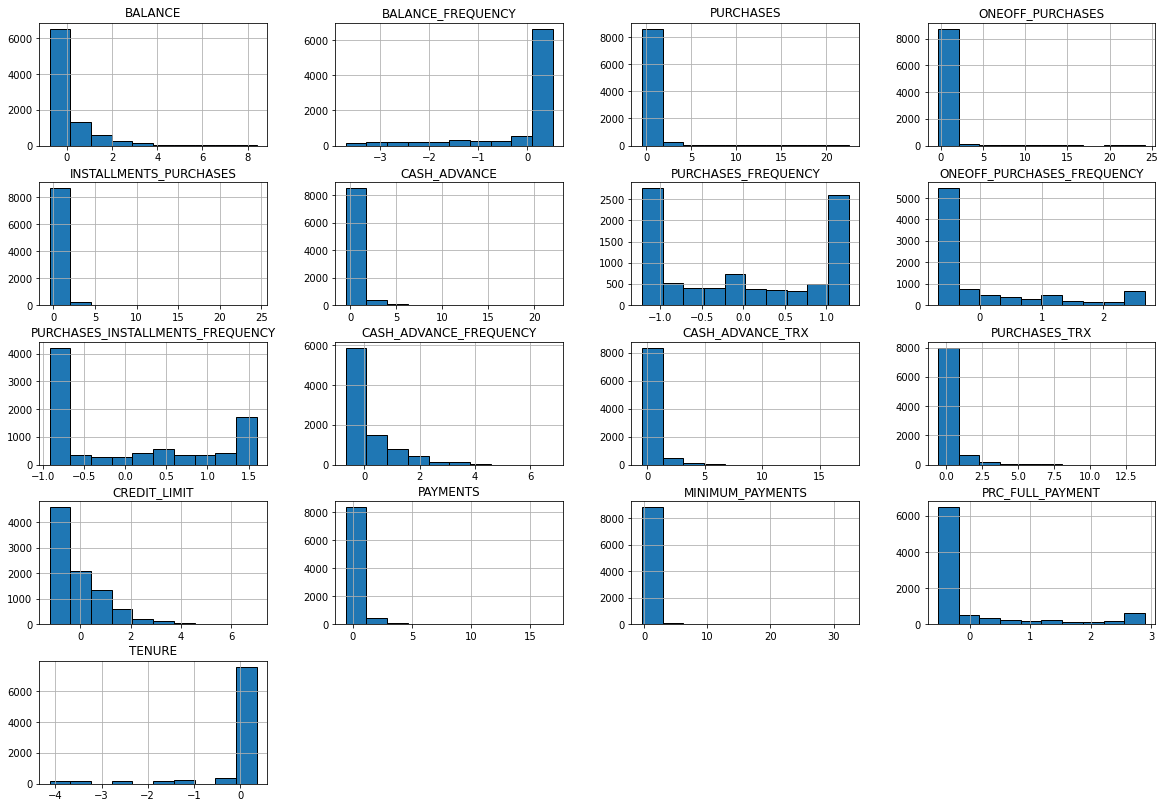

In [92]:
df_Normalize.hist(figsize=(20,14), edgecolor="black")
plt.show()

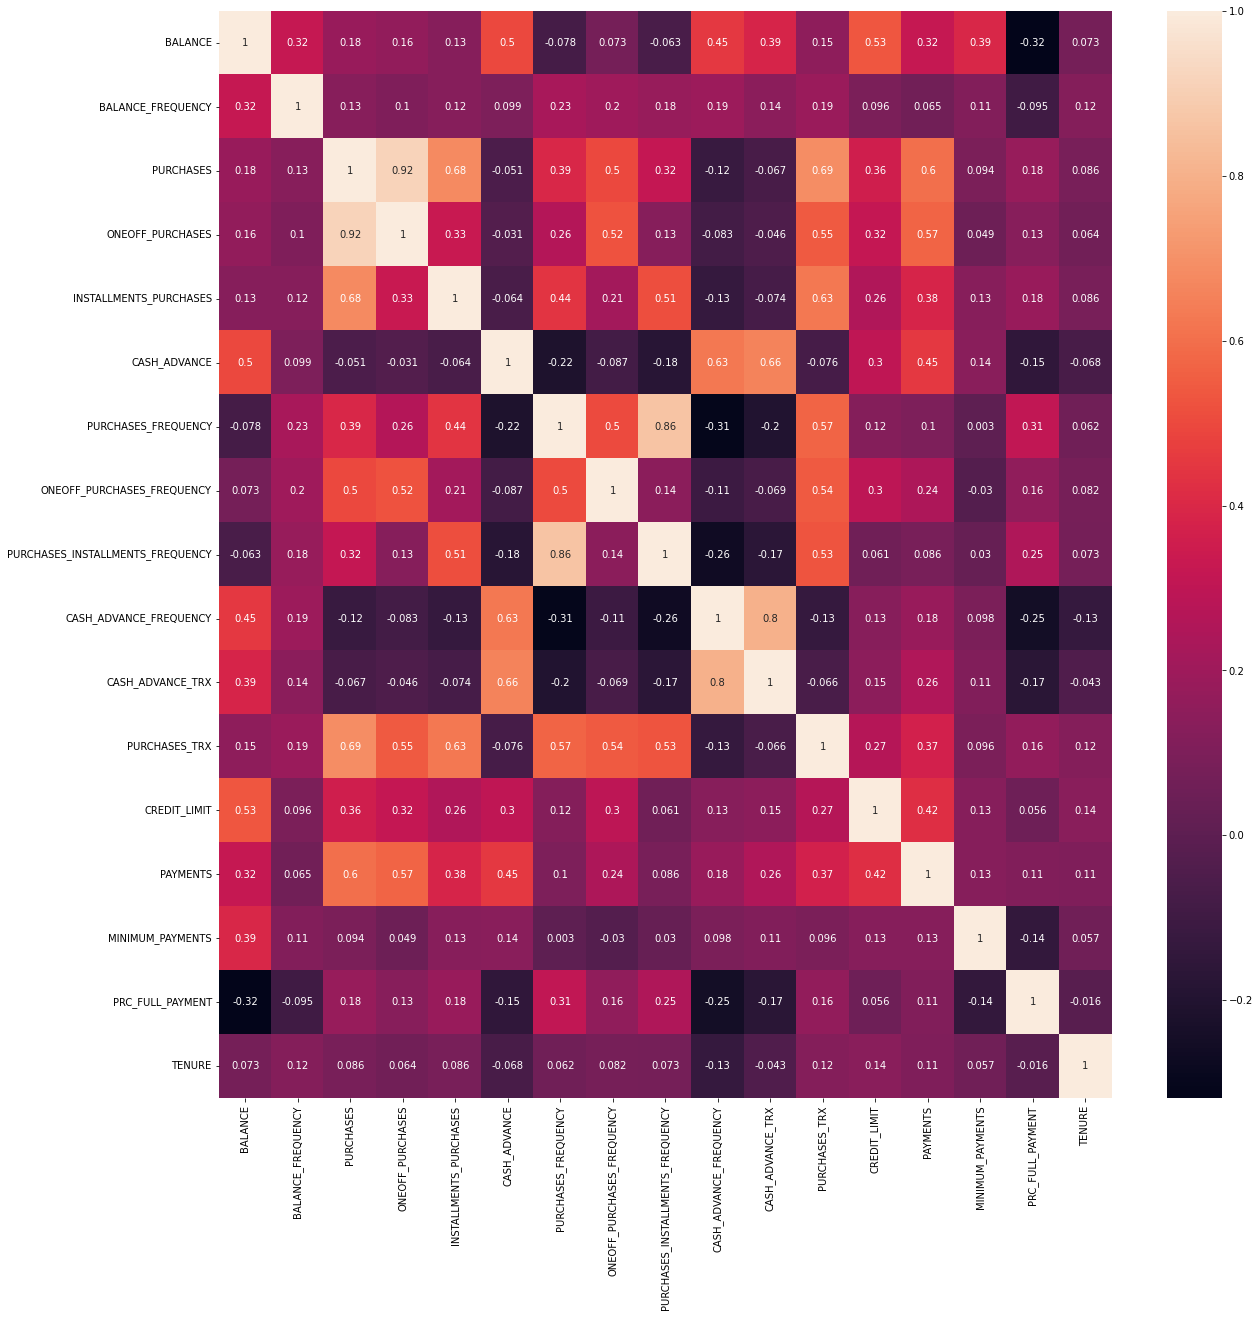

In [93]:
plt.figure(figsize = (20,20))

sns.heatmap(df_Normalize.corr(), annot =True)

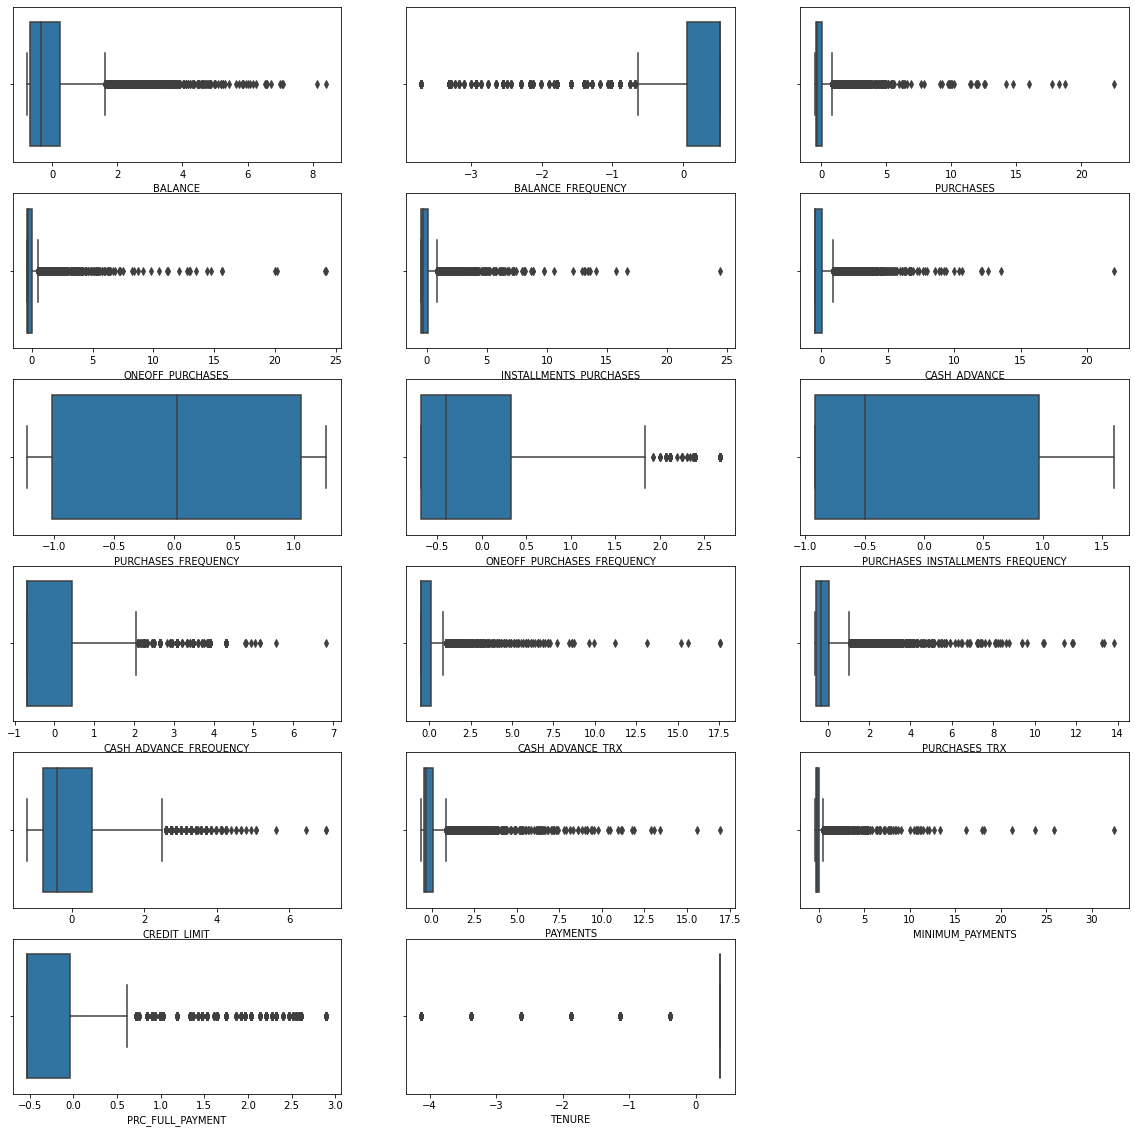

In [94]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df_Normalize.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df_Normalize.iloc[ : , col])
plt.show()

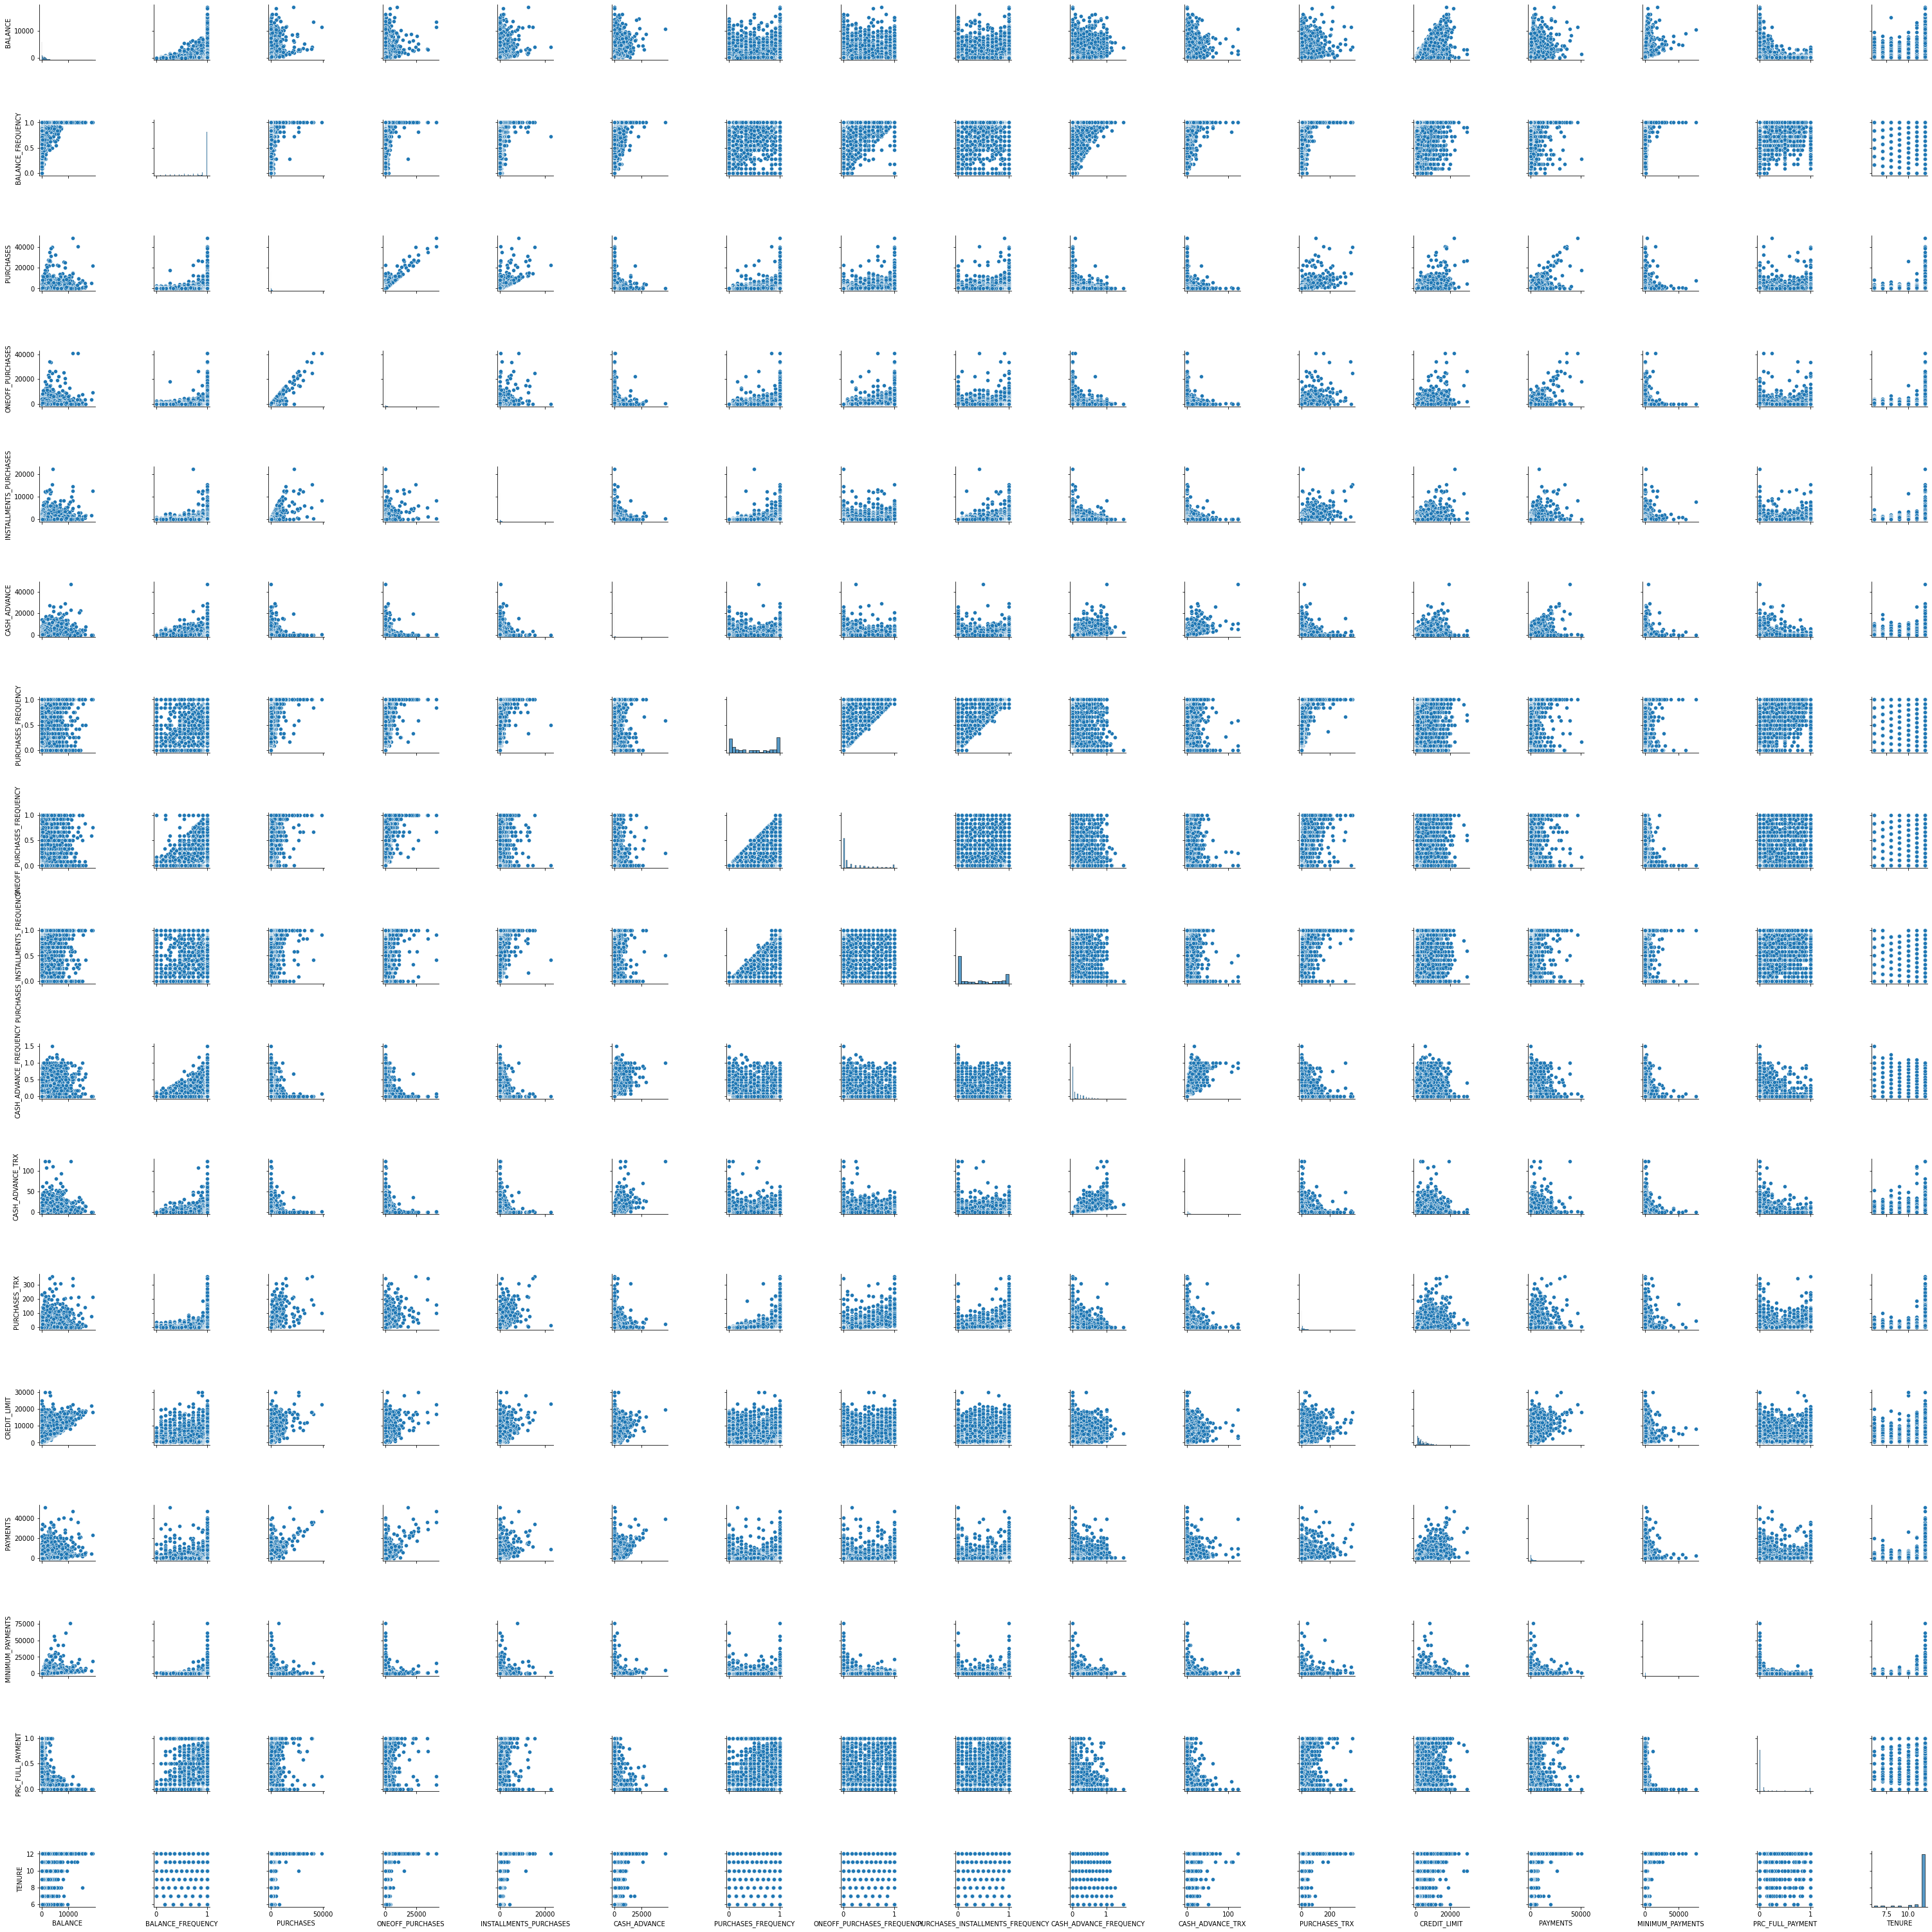

In [95]:
sns.pairplot(df)

# K-means 


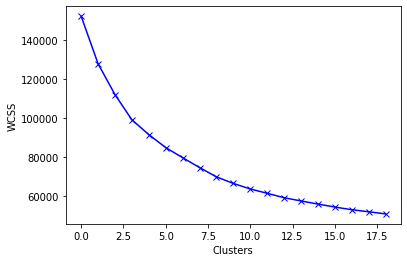

In [96]:
# С помощью метода локтя ищем количество кластеров
from sklearn.cluster import KMeans
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_Normalize)
    score_1.append(kmeans.inertia_)
plt.plot(score_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [97]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(df_Normalize)
labels = kmeans.labels_

In [98]:
# С помощью PCA уменьшаем размерность данных
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_Normalize)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682218,-1.076449,3
1,-1.138299,2.506475,1
2,0.969667,-0.383536,0
3,-0.873617,0.043176,3
4,-1.599434,-0.688582,3


In [99]:
# Вычисляем центры кластеров и предсказываем индексы
kmeans.fit_predict(df_Normalize)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_Normalize.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
1,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972


In [100]:
# Возвращаем значения до нормализации
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



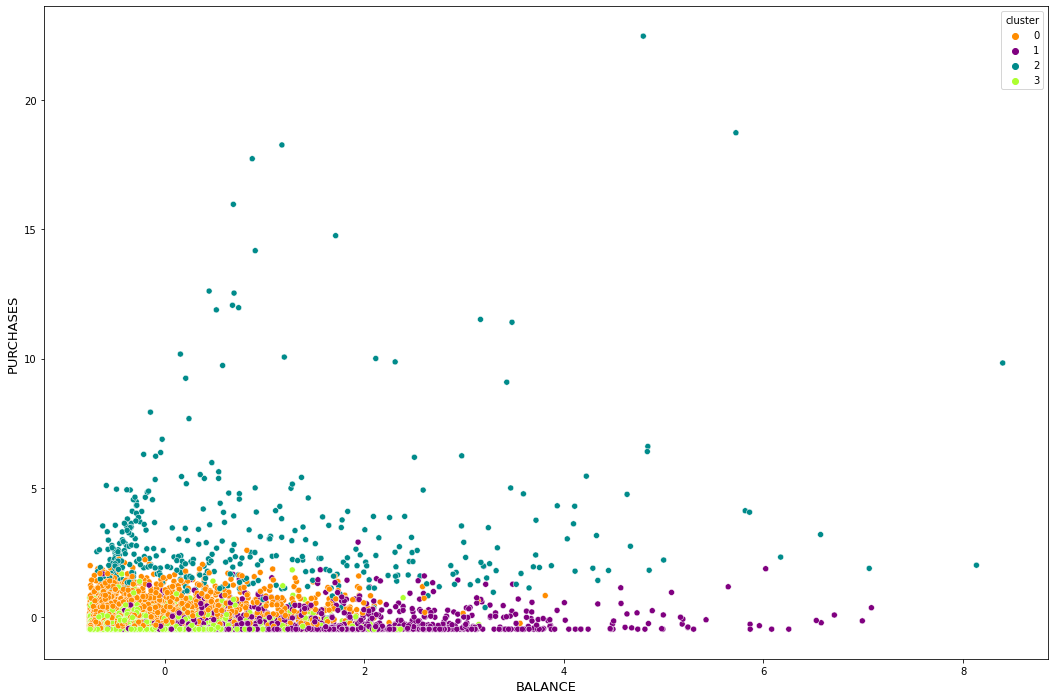

In [101]:
plt.figure(figsize=(18,12))
sns.scatterplot(df_Normalize['BALANCE'], df_Normalize['PURCHASES'], hue='cluster', data=pca_df, palette=['darkorange', 'purple', 'darkcyan', 'greenyellow'])
plt.xlabel('BALANCE', fontsize=13)
plt.ylabel('PURCHASES', fontsize=13)
plt.show()

In [102]:
# Оценка по Силуэту
from sklearn.metrics import silhouette_score 
silhouette_score(df_Normalize,labels)

0.1976074492720698

Cluster 0 и 3 - люди с низким балансом и расходами, cluster 2 - имеют высокие расходы и большой баланс, cluster 1 - почти не тратит деньги и имеют большой баланс 

# Decision Tree


[Text(0.5, 0.9, 'PURCHASES_FREQUENCY <= 0.577\ngini = 0.641\nsamples = 8950\nvalue = [3367, 1198, 409, 3976]\nclass = Досредний класс'),
 Text(0.25, 0.7, 'BALANCE <= 2868.068\ngini = 0.341\nsamples = 4846\nvalue = [105, 900, 14, 3827]\nclass = Досредний класс'),
 Text(0.125, 0.5, 'BALANCE <= 1420.692\ngini = 0.177\nsamples = 3963\nvalue = [93, 281, 6, 3583]\nclass = Досредний класс'),
 Text(0.0625, 0.3, 'PURCHASES_FREQUENCY <= 0.477\ngini = 0.119\nsamples = 2957\nvalue = [87, 94, 3, 2773]\nclass = Досредний класс'),
 Text(0.03125, 0.1, 'gini = 0.078\nsamples = 2650\nvalue = [15, 91, 1, 2543]\nclass = Досредний класс'),
 Text(0.09375, 0.1, 'gini = 0.384\nsamples = 307\nvalue = [72, 3, 2, 230]\nclass = Досредний класс'),
 Text(0.1875, 0.3, 'PURCHASES <= 4040.575\ngini = 0.317\nsamples = 1006\nvalue = [6, 187, 3, 810]\nclass = Досредний класс'),
 Text(0.15625, 0.1, 'gini = 0.31\nsamples = 1001\nvalue = [4, 187, 0, 810]\nclass = Досредний класс'),
 Text(0.21875, 0.1, 'gini = 0.48\nsamples 

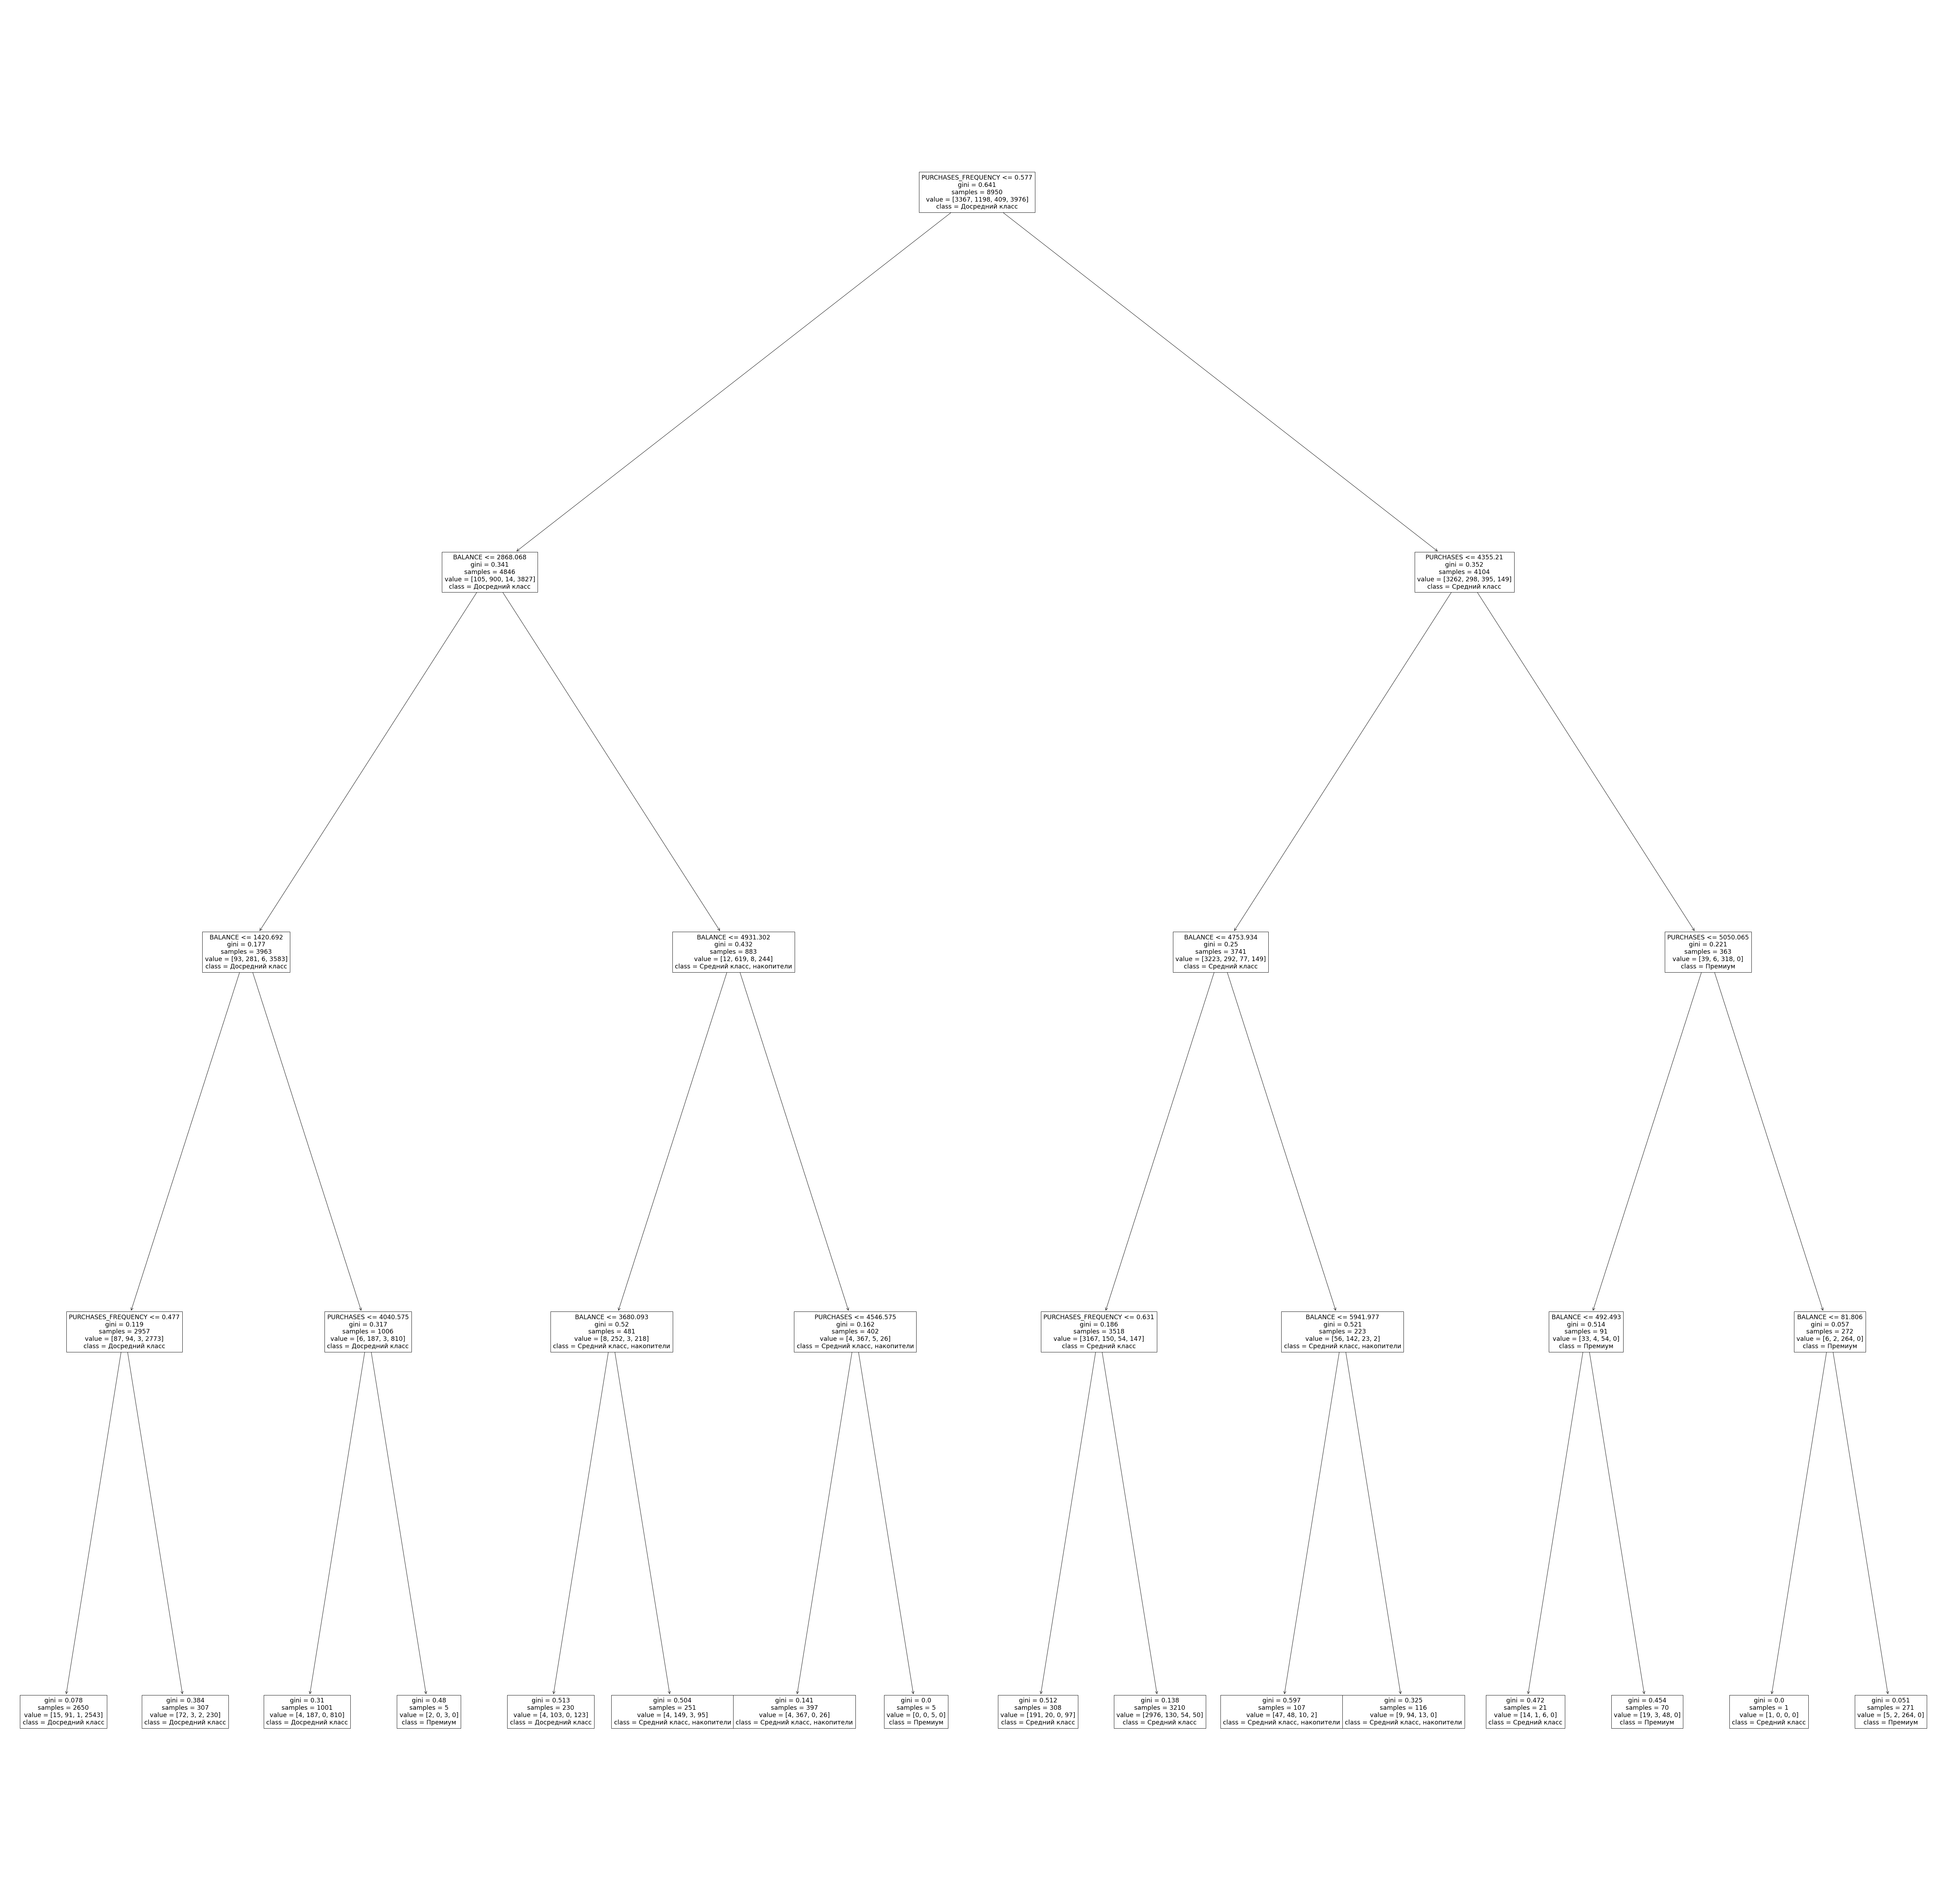

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df["cluster"] = kmeans.labels_.astype(float)

tree_builder =DecisionTreeClassifier(max_depth = 4)

model = tree_builder.fit(df[['BALANCE',
'PURCHASES_FREQUENCY',
'PURCHASES']], df["cluster"])

fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, feature_names=['BALANCE',
'PURCHASES_FREQUENCY',
'PURCHASES'],
class_names = ['Средний класс','Средний класс, накопители','Премиум','Досредний класс'],
)

# Spectral Clustering

In [104]:
import plotly.express as px
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

В этом блоке кода мы строим график коэффициента объясненной дисперсии, где мы анализируем, какой процент добавляет каждый дополнительный компонент к общей сумме.

In [105]:
pca = PCA()
pca.fit(df_Normalize)
explained_var = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, explained_var.shape[0] + 1),
    y=explained_var,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Выберем 3 компоненты


In [106]:
pca_data = PCA(n_components=3)
credit_pca = pd.DataFrame(pca_data.fit_transform(df_Normalize), columns=['Component 1','Component 2','Component 3'])
credit_pca

,Component 1,Component 2,Component 3
0,-1.682220,-1.076448,0.488490
1,-1.138298,2.506465,0.601209
2,0.969682,-0.383527,0.102327
3,-0.873625,0.043176,1.460184
4,-1.599434,-0.688580,0.365064
...,...,...,...
8945,-0.359629,-2.016140,-0.995383
8946,-0.564366,-1.639109,-1.290245
8947,-0.926203,-1.810779,-0.474749
8948,-2.336551,-0.657961,0.974722


In [107]:
# По методу Локтя посмотрим сколько нужно кластеров 
inertia = []
for i in range(1,10):
    cluster = KMeans(n_clusters=i)
    cluster.fit(credit_pca)
    inertia.append(cluster.inertia_)
px.line(inertia, title="Elbow graph for Spectral Clustering",labels={"index":"Clusters","value":"Inertia"})

In [108]:
# Сама отрисовка кластеров
cluster_spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
cluster_spectral.fit(credit_pca)
df['Labels'] = cluster_spectral.labels_
px.scatter_3d(x=credit_pca['Component 1'],y=credit_pca['Component 2'],z=credit_pca['Component 3'], color=cluster_spectral.labels_,size_max=18)

In [109]:
px.scatter(df,x='BALANCE', y='PURCHASES',color='Labels')

In [110]:
px.scatter(df,x='CREDIT_LIMIT', y='PAYMENTS',color='Labels', title='Credit limit vs Payments')

In [111]:
from sklearn.metrics import silhouette_score 
silhouette_score(df_Normalize,cluster_spectral.labels_)

0.1037503560294701

# Выводы
Выделено четыре сегмента клиентов:

*   Люди с низким балансом и расходами
*   Люди с низкими расходами и большим балансом
*   Люди с большими расходами и низким балансом 
*   Люди, имеющие высокие расходы и большой баланс

По выполненным методам можно определить наиболее "выгодных" клиентов, кому можно предоставить больший кредитный счет 

Например, стоит повышать кредитный лимит людям с большими тратами и маленбким балансом, стимулируя их тратить еще больше

Также было построено дерево, позволяющее предположить то же

Как можно заметить K-means имеет бОльшую точность, чем Spectrul Clustering, пускай обе они достаточно неточны (0.19 против 0.10) 

Также с помощью кластеров можно увидеть долю людей, которые плохо распоряжаются своими финансами, влезают в долги и тд